In [150]:
import sys
sys.path.append("/home/rohit/PhD_Work/GM_my_version/Graph_matching/")
import networkx as nx
import random
import os
from os import listdir
import numpy as np
import tools.graph_processing as gp
import tools.plotly_extension as tp
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import tools.graph_visu as gv
import slam.io as sio

In [151]:
# G = nx.complete_graph(10)
# nx.draw(G)
# len(G.edges())

In [152]:
# edge_to_remove = random.sample(list(G.edges),22)
# G.remove_edges_from(edge_to_remove)
# len(G.edges())

In [153]:
mypath = "./0/"
directories = listdir(mypath)

In [154]:
print(directories[0],directories[20],directories[3],directories[35])

noise_600,outliers_16 noise_800,outliers_16 noise_200,outliers_4 noise_1400,outliers_0


In [155]:
folders = [directories[0],directories[20],directories[3],directories[31]]

In [156]:
folders

['noise_600,outliers_16',
 'noise_800,outliers_16',
 'noise_200,outliers_4',
 'noise_1000,outliers_16']

In [157]:
def plot_edge_rmv(x,y,label):
    plt.plot(x, y,marker="o", label=label)
    plt.xlabel("Mean across all the nodes")
    plt.ylabel("Percentage of edges removed")
    plt.legend(loc="upper left")
    plt.show()

In [232]:
def edge_len_threshold(G,thr):

    short_edges = [edge for edge in list(G.edges) if G.get_edge_data(edge[0],edge[1])['geodesic_distance'] <= 20]
    
    if len(short_edges)<round(len(graph.edges)*thr):
        edge_to_add = random.sample(list(graph.edges),round(len(graph.edges)*thr - len(short_edges)))
        
        return short_edges+edge_to_add
    
    else:
        
        #edge_to_add = random.sample(list(graph.edges),round(len(graph.edges)*(thr/3)))
        
        short_edges = random.sample(short_edges,round(len(graph.edges)*thr))
        
        return short_edges
        

In [233]:
#list(graph.edges)[0]

In [234]:
#graph.get_edge_data(0,6)['geodesic_distance']

In [235]:
#edg2rmv = edge_len_threshold(graph,0.07)

In [236]:
#edg2rmv

In [246]:
folders.reverse()

removal percentage: 0.0
removal percentage: 0.03
removal percentage: 0.05
found disconnected components
found disconnected components
found disconnected components
found disconnected components
found disconnected components
removal percentage: 0.07


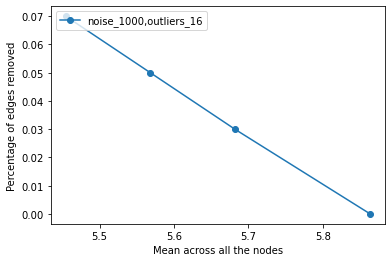

In [247]:
per_rmv = [0.0, 0.03, 0.05,0.07] # percentage of edges to remove from simulated graph

mean_degree_simu = list()

for file in folders:

    for per in per_rmv:

        degree_values = 20
        # real data
        path_to_graphs = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/OASIS_full_batch/modified_graphs'

        # Get the meshes
        list_graphs = gp.load_graphs_in_list(path_to_graphs)
        degree_list = list()
        fig_labels = list()
        for ind, graph in enumerate(list_graphs):
            fig_labels.append('graph_'+str(ind))
            gp.remove_dummy_nodes(graph)
            #print(len(graph.nodes))
            graph.remove_edges_from(nx.selfloop_edges(graph))
            degree_list.append(list(dict(nx.degree(graph)).values()))
        # compute the histos
        degree_histo = np.zeros((len(degree_list), degree_values))
        for i_d, dist in enumerate(degree_list):
            count = np.bincount(dist)
            for i,c in enumerate(count):
                degree_histo[i_d, i] += c
            degree_histo[i_d, :] = degree_histo[i_d, :]/np.sum(count)
        # lines for the plot
        x = list(range(degree_values))
        y = np.mean(degree_histo, 0)
        y_upper = y + np.std(degree_histo, 0)
        y_lower = y - np.std(degree_histo, 0)
        # error plot from real data
        fig_c = tp.error_plot(x=x, y=y, y_lower=y_lower, y_upper=y_upper, line_label='degree real data', color='rgb(20, 20, 200)')

        #simulated graphs
        path_to_graphs = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/0/'+ file +'/graphs'
        # Get the meshes


        list_graphs = gp.load_graphs_in_list(path_to_graphs)
        degree_list_simu = list()
        fig_labels = list()
        for ind, graph in enumerate(list_graphs):
            fig_labels.append('simu_graph_'+str(ind))
            gp.remove_dummy_nodes(graph)
            
            # Remove edges
            edge_to_remove = edge_len_threshold(graph,per)
            graph.remove_edges_from(edge_to_remove)

            if nx.is_connected(graph) == False:

                print("found disconnected components")

            graph.remove_edges_from(nx.selfloop_edges(graph))
            degree_list_simu.append(list(dict(nx.degree(graph)).values()))
        # compute the histos
        degree_histo = np.zeros((len(degree_list_simu), degree_values))
        for i_d, dist in enumerate(degree_list_simu):
            count = np.bincount(dist)
            for i,c in enumerate(count):
                degree_histo[i_d, i] += c
            degree_histo[i_d, :] = degree_histo[i_d, :]/np.sum(count)
        # lines for the plot
        y = np.mean(degree_histo, 0)
        y_upper = y + np.std(degree_histo, 0)
        y_lower = y - np.std(degree_histo, 0)
        # error plot from real data
        fig_c2 = tp.error_plot(x=x, y=y, y_lower=y_lower, y_upper=y_upper, line_label='degree simus', color='rgb(200, 20, 20)')
        fig_c.extend(fig_c2)
        fig = go.Figure(fig_c)


        fig.update_layout(
            yaxis_title='proportion',
            title=file,
            hovermode="x"
        )
        #fig.show(renderer="browser")
        fig.write_html('first_figure.html', auto_open=True)
        
        degree_flatten = [elem for lists in degree_list_simu for elem in lists]
        mean_degree_simu.append(np.mean(degree_flatten))
        
        print("removal percentage:",per)
        
    plot_edge_rmv(mean_degree_simu,per_rmv,file)
    break
        
    
        #simu_node_density(path_to_graphs,file)

In [248]:
def mean_edge_len(G):    
    all_geo = [z['geodesic_distance'] for x,y,z in list(G.edges.data())]
    mean_geo = np.array(all_geo).mean()
    std = np.std(all_geo)
    
    return all_geo

In [249]:
geo_values = 200
# real data
path_to_graphs = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/OASIS_full_batch/modified_graphs'

# Get the meshes
list_graphs_real = gp.load_graphs_in_list(path_to_graphs)
geo_list = list()
fig_labels = list()

for ind, graph in enumerate(list_graphs_real):
    fig_labels.append('graph_'+str(ind))
    gp.remove_dummy_nodes(graph)
    print(len(graph.nodes))
    graph.remove_edges_from(nx.selfloop_edges(graph))
    geo_list.append(mean_edge_len(graph))
# compute the histos
geo_histo = np.zeros((len(geo_list), geo_values))
for i_d, dist in enumerate(geo_list):
    count = np.bincount(dist)
    print("len bincount",len(count))
    for i,c in enumerate(count):
        print(i,c)
        geo_histo[i_d, i] += c
    geo_histo[i_d, :] = geo_histo[i_d, :]/np.sum(count)
# lines for the plot
x = list(range(geo_values))
y = np.mean(geo_histo, 0)
y_upper = y + np.std(geo_histo, 0)
y_lower = y - np.std(geo_histo, 0)
# error plot from real data
fig_c = tp.error_plot(x=x, y=y, y_lower=y_lower, y_upper=y_upper, line_label='geo real data', color='rgb(20, 20, 200)')

#simulated graphs
#path_to_graphs = 'data/simu_graph/0/noise_1400,outliers_16/graphs/'
    # Get the meshes
#list_graphs = gp.load_graphs_in_list(path_to_graphs)
geo_list = list()
fig_labels = list()
for ind, graph in enumerate(list_graphs):
    fig_labels.append('simu_graph_'+str(ind))
    gp.remove_dummy_nodes(graph)
    print(len(graph.nodes))
    graph.remove_edges_from(nx.selfloop_edges(graph))
    geo_list.append(mean_edge_len(graph))
# compute the histos
geo_histo = np.zeros((len(geo_list), geo_values))
for i_d, dist in enumerate(geo_list):
    count = np.bincount(dist)
    for i,c in enumerate(count):
        geo_histo[i_d, i] += c
    geo_histo[i_d, :] = geo_histo[i_d, :]/np.sum(count)
# lines for the plot
y = np.mean(geo_histo, 0)
y_upper = y + np.std(geo_histo, 0)
y_lower = y - np.std(geo_histo, 0)
# error plot from real data
fig_c2 = tp.error_plot(x=x, y=y, y_lower=y_lower, y_upper=y_upper, line_label='geo simus', color='rgb(200, 20, 20)')
fig_c.extend(fig_c2)
fig = go.Figure(fig_c)

fig.update_layout(
    yaxis_title='proportion',
    title=file,
    hovermode="x"
)
#fig.show(renderer="browser")
fig.write_html('first_figure.html', auto_open=True)

83
91
89
85
87
92
94
80
89
85
92
89
88
93
82
88
89
89
95
94
91
82
93
89
101
88
94
87
92
86
81
87
91
92
86
89
79
84
88
89
86
101
88
81
86
91
94
86
92
89
81
95
91
91
82
91
94
85
83
90
95
85
89
87
86
86
81
91
95
90
85
83
89
83
93
90
91
86
90
86
91
85
80
83
84
79
83
94
96
89
93
87
87
85
92
89
92
86
84
87
96
89
96
88
97
86
88
83
78
81
91
83
84
94
80
92
94
86
89
97
91
96
83
89
89
93
94
85
91
83
77
89
87
86
len bincount 126
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 2
15 0
16 0
17 2
18 2
19 1
20 1
21 6
22 4
23 3
24 6
25 5
26 5
27 5
28 5
29 5
30 4
31 8
32 3
33 5
34 7
35 2
36 5
37 4
38 9
39 8
40 10
41 3
42 2
43 2
44 6
45 7
46 4
47 2
48 6
49 4
50 3
51 6
52 3
53 1
54 3
55 1
56 4
57 4
58 3
59 4
60 4
61 3
62 2
63 5
64 2
65 4
66 1
67 1
68 1
69 0
70 1
71 2
72 1
73 0
74 3
75 1
76 2
77 2
78 0
79 1
80 1
81 0
82 1
83 0
84 0
85 0
86 0
87 0
88 2
89 1
90 1
91 0
92 0
93 0
94 0
95 1
96 0
97 0
98 0
99 1
100 0
101 1
102 1
103 0
104 0
105 0
106 0
107 0
108 0
109 1
110 0
111 0
112 0
113 0
114 

136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 1
len bincount 102
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 1
15 0
16 3
17 1
18 1
19 1
20 2
21 1
22 4
23 6
24 3
25 5
26 4
27 5
28 7
29 8
30 2
31 8
32 5
33 9
34 5
35 4
36 5
37 9
38 4
39 3
40 8
41 6
42 6
43 2
44 3
45 5
46 7
47 8
48 6
49 6
50 6
51 3
52 4
53 3
54 2
55 1
56 1
57 5
58 3
59 3
60 8
61 1
62 0
63 3
64 1
65 0
66 2
67 1
68 6
69 1
70 2
71 2
72 2
73 1
74 0
75 1
76 0
77 1
78 0
79 2
80 0
81 1
82 0
83 1
84 0
85 0
86 1
87 3
88 0
89 0
90 1
91 0
92 1
93 0
94 2
95 0
96 2
97 0
98 1
99 1
100 0
101 1
len bincount 118
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 1
15 1
16 0
17 0
18 3
19 4
20 3
21 2
22 4
23 8
24 4
25 4
26 3
27 7
28 9
29 5
30 4
31 3
32 4
33 8
34 4
35 4
36 4
37 11
38 7
39 7
40 8
41 5
42 4
43 5
44 3
45 9
46 10
47 1
48 6
49 6
50 3
51 3
52 5
53 6
54 2
55 4
56 3
57 2
58 2
59 2
60 3
61 2
62 3
63 1
64 1
65 1
66 2
67 2
68 3
69 3
70 0
71 0
72 2

70 0
71 2
72 1
73 1
74 1
75 1
76 3
77 0
78 0
79 0
80 3
81 1
82 1
83 1
84 2
85 0
86 1
87 3
88 0
89 0
90 1
91 0
92 1
93 0
94 0
95 0
96 1
97 0
98 0
99 0
100 1
101 0
102 0
103 1
104 0
105 1
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 2
len bincount 129
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 2
15 2
16 0
17 1
18 2
19 3
20 4
21 6
22 5
23 3
24 6
25 3
26 5
27 6
28 6
29 8
30 3
31 5
32 5
33 4
34 9
35 1
36 6
37 7
38 8
39 13
40 6
41 5
42 7
43 8
44 3
45 1
46 4
47 7
48 5
49 3
50 4
51 3
52 9
53 5
54 4
55 7
56 3
57 4
58 4
59 3
60 0
61 1
62 2
63 3
64 5
65 1
66 1
67 3
68 2
69 3
70 0
71 2
72 2
73 0
74 2
75 0
76 0
77 0
78 1
79 0
80 0
81 1
82 0
83 0
84 1
85 1
86 1
87 1
88 0
89 2
90 0
91 2
92 1
93 1
94 0
95 1
96 0
97 0
98 1
99 0
100 0
101 0
102 3
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0


102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 1
111 0
112 0
113 0
114 0
115 0
116 0
117 1
118 0
119 0
120 0
121 0
122 1
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 1
139 0
140 0
141 0
142 0
143 0
144 0
145 1
len bincount 137
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 1
15 0
16 1
17 2
18 3
19 4
20 2
21 3
22 6
23 2
24 7
25 6
26 4
27 5
28 4
29 7
30 6
31 5
32 6
33 5
34 4
35 8
36 9
37 10
38 8
39 4
40 4
41 5
42 7
43 5
44 9
45 4
46 5
47 6
48 2
49 6
50 1
51 4
52 9
53 1
54 2
55 4
56 6
57 3
58 1
59 1
60 0
61 1
62 2
63 2
64 2
65 6
66 0
67 1
68 1
69 4
70 3
71 2
72 2
73 1
74 1
75 1
76 2
77 1
78 2
79 0
80 1
81 0
82 2
83 1
84 1
85 0
86 3
87 2
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 1
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 1
108 0
109 0
110 1
111 0
112 0
113 0
114 1
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 1
len bi

12 0
13 0
14 1
15 2
16 0
17 2
18 3
19 0
20 3
21 1
22 1
23 5
24 4
25 2
26 6
27 6
28 5
29 4
30 8
31 9
32 4
33 5
34 6
35 5
36 1
37 11
38 5
39 9
40 4
41 5
42 4
43 9
44 9
45 4
46 3
47 5
48 1
49 3
50 3
51 5
52 4
53 4
54 3
55 7
56 5
57 0
58 2
59 3
60 4
61 2
62 1
63 1
64 1
65 4
66 2
67 3
68 0
69 3
70 0
71 1
72 3
73 1
74 2
75 0
76 3
77 1
78 1
79 1
80 0
81 2
82 1
83 1
84 0
85 0
86 0
87 2
88 1
89 0
90 0
91 1
92 1
93 0
94 0
95 1
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 1
110 0
111 0
112 0
113 1
114 0
115 0
116 1
117 0
118 0
119 0
120 0
121 0
122 1
len bincount 114
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 2
17 2
18 3
19 2
20 2
21 2
22 4
23 6
24 4
25 4
26 6
27 5
28 8
29 9
30 6
31 6
32 7
33 4
34 7
35 5
36 7
37 1
38 7
39 4
40 10
41 5
42 8
43 3
44 7
45 4
46 9
47 4
48 5
49 3
50 6
51 4
52 6
53 4
54 0
55 2
56 3
57 2
58 3
59 5
60 4
61 2
62 1
63 1
64 1
65 0
66 0
67 3
68 2
69 2
70 1
71 2
72 0
73 0
74 3
75 1
76 1
77 2
78 1
79 1
80 3
81 1
82 

76 3
77 0
78 0
79 0
80 1
81 1
82 1
83 0
84 0
85 1
86 0
87 1
88 0
89 1
90 1
91 0
92 1
93 0
94 1
95 1
96 0
97 0
98 0
99 0
100 0
101 0
102 1
103 1
104 0
105 0
106 0
107 1
108 0
109 0
110 0
111 0
112 0
113 0
114 1
115 0
116 0
117 1
len bincount 139
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 2
16 4
17 2
18 1
19 5
20 5
21 4
22 4
23 4
24 5
25 13
26 1
27 5
28 4
29 3
30 4
31 10
32 7
33 5
34 4
35 10
36 9
37 5
38 3
39 6
40 12
41 8
42 9
43 7
44 5
45 7
46 4
47 3
48 7
49 3
50 2
51 1
52 4
53 1
54 4
55 4
56 0
57 1
58 0
59 3
60 5
61 3
62 6
63 1
64 2
65 2
66 1
67 1
68 1
69 0
70 1
71 3
72 2
73 2
74 1
75 0
76 1
77 1
78 1
79 0
80 0
81 0
82 0
83 2
84 0
85 2
86 0
87 2
88 0
89 0
90 1
91 1
92 1
93 0
94 1
95 0
96 3
97 0
98 0
99 0
100 1
101 0
102 0
103 1
104 0
105 0
106 0
107 0
108 1
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 1
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 1
len bincount 166
0 0
1 0
2 

110 0
111 0
112 1
113 0
114 1
115 1
len bincount 121
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 1
15 0
16 0
17 0
18 3
19 2
20 2
21 1
22 6
23 2
24 5
25 5
26 7
27 4
28 5
29 3
30 4
31 9
32 5
33 7
34 5
35 5
36 8
37 10
38 9
39 7
40 8
41 3
42 5
43 3
44 4
45 4
46 5
47 4
48 11
49 5
50 7
51 2
52 1
53 9
54 3
55 2
56 3
57 2
58 6
59 1
60 4
61 4
62 2
63 2
64 2
65 1
66 0
67 2
68 1
69 0
70 0
71 2
72 0
73 0
74 2
75 2
76 2
77 1
78 1
79 2
80 0
81 1
82 1
83 0
84 0
85 1
86 1
87 3
88 0
89 1
90 2
91 0
92 1
93 0
94 0
95 1
96 0
97 0
98 0
99 0
100 0
101 1
102 0
103 0
104 0
105 0
106 0
107 0
108 1
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 1
len bincount 122
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 1
16 2
17 1
18 1
19 1
20 2
21 2
22 6
23 3
24 7
25 3
26 2
27 0
28 6
29 6
30 4
31 2
32 8
33 10
34 12
35 3
36 5
37 4
38 12
39 9
40 6
41 3
42 4
43 7
44 8
45 8
46 4
47 6
48 3
49 3
50 3
51 6
52 4
53 3
54 3
55 6
56 8
57 1
58 3
59 2
60 2
61 0
62 3
63 0

41 10
42 5
43 3
44 5
45 7
46 2
47 6
48 3
49 8
50 4
51 1
52 8
53 2
54 3
55 5
56 5
57 1
58 2
59 0
60 5
61 3
62 1
63 6
64 1
65 1
66 1
67 0
68 2
69 2
70 0
71 3
72 2
73 1
74 1
75 1
76 1
77 2
78 1
79 0
80 0
81 0
82 0
83 3
84 0
85 0
86 1
87 0
88 0
89 1
90 4
91 0
92 1
93 1
94 1
95 2
96 0
97 0
98 0
99 1
100 0
101 0
102 0
103 0
104 1
105 0
106 0
107 1
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 1
len bincount 116
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 1
15 1
16 1
17 2
18 2
19 4
20 3
21 4
22 2
23 3
24 5
25 8
26 7
27 6
28 9
29 6
30 7
31 7
32 10
33 3
34 7
35 9
36 12
37 1
38 8
39 9
40 4
41 10
42 6
43 5
44 10
45 5
46 5
47 7
48 7
49 3
50 5
51 4
52 1
53 4
54 4
55 4
56 3
57 3
58 2
59 1
60 2
61 3
62 3
63 4
64 0
65 0
66 0
67 3
68 2
69 3
70 1
71 1
72 1
73 1
74 1
75 2
76 1
77 2
78 1
79 0
80 1
81 1
82 1
83 0
84 1
85 1
86 0
87 1
88 1
89 1
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 1
98 0
99 1
100 1
101 1
102 1
103 0
104 0
105 0
106 0
107 0
108 0
109 1
1

9 0
10 0
11 0
12 0
13 0
14 1
15 2
16 7
17 0
18 2
19 1
20 4
21 1
22 4
23 4
24 7
25 2
26 5
27 10
28 4
29 7
30 10
31 7
32 7
33 10
34 1
35 4
36 6
37 7
38 9
39 4
40 10
41 8
42 7
43 1
44 6
45 4
46 4
47 6
48 2
49 3
50 4
51 4
52 6
53 6
54 7
55 3
56 4
57 3
58 3
59 1
60 1
61 2
62 3
63 1
64 1
65 1
66 1
67 6
68 0
69 2
70 1
71 1
72 0
73 2
74 3
75 0
76 1
77 0
78 1
79 0
80 1
81 4
82 0
83 1
84 0
85 1
86 1
87 0
88 1
89 0
90 2
91 2
92 0
93 1
94 1
95 0
96 0
97 1
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 1
107 0
108 0
109 1
len bincount 119
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 1
14 1
15 1
16 0
17 1
18 3
19 5
20 1
21 1
22 4
23 7
24 6
25 2
26 2
27 4
28 7
29 8
30 5
31 5
32 9
33 5
34 3
35 8
36 6
37 10
38 3
39 5
40 5
41 4
42 10
43 7
44 6
45 4
46 5
47 4
48 5
49 2
50 1
51 4
52 1
53 4
54 3
55 1
56 4
57 2
58 6
59 2
60 2
61 0
62 0
63 2
64 1
65 1
66 1
67 3
68 2
69 1
70 4
71 2
72 1
73 3
74 1
75 0
76 1
77 2
78 2
79 2
80 5
81 1
82 1
83 1
84 0
85 0
86 0
87 0
88 1
89 0
90 1
91 0
92 0
93 0
94 

12 0
13 0
14 0
15 0
16 0
17 0
18 1
19 2
20 3
21 5
22 1
23 3
24 1
25 7
26 5
27 3
28 2
29 7
30 4
31 6
32 2
33 7
34 12
35 3
36 7
37 5
38 11
39 6
40 4
41 6
42 6
43 5
44 5
45 2
46 4
47 6
48 4
49 4
50 5
51 3
52 5
53 4
54 1
55 4
56 2
57 3
58 1
59 3
60 1
61 4
62 1
63 5
64 2
65 3
66 3
67 1
68 3
69 2
70 2
71 1
72 1
73 2
74 1
75 0
76 2
77 1
78 1
79 0
80 1
81 0
82 0
83 1
84 0
85 0
86 1
87 0
88 1
89 1
90 2
91 0
92 0
93 0
94 0
95 0
96 1
97 1
98 1
99 0
100 0
101 0
102 0
103 0
104 0
105 1
106 0
107 1
108 0
109 0
110 0
111 0
112 0
113 1
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 1
len bincount 148
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 1
17 3
18 2
19 0
20 1
21 1
22 1
23 4
24 4
25 6
26 4
27 5
28 1
29 5
30 6
31 8
32 4
33 3
34 6
35 3
36 5
37 3
38 5
39 4
40 5
41 1
42 4
43 4
44 7
45 4
46 4
47 4
48 5
49 5
50 6
51 1
52 

In [ ]:
#graph.edges.data()

In [44]:
gg1 = list_graphs[0]

In [ ]:
# KL-divergence for uneven_array

def kl_divergence(p, q):
    if len(p)>len(q):
        p = np.random.choice(p,len(q))
    elif len(q)>len(p):
        q = np.random.choice(q,len(p))
    print("len_p:",len(p)," ","len_q:",len(q))
    return np.sum( p * np.log(p / q))


In [16]:
degree_real = []
for lists in degree_list:
    for elem in lists:
        degree_real.append(elem)

In [ ]:
degree_simu = []
for lists in degree_list_simu:
    for elem in lists:
        degree_simu.append(elem)

In [ ]:
# zero_percent edges_removed
kl_divergence(np.array(degree_real),np.array(degree_simu))

In [ ]:
# 4_percent edges_removed
kl_divergence(np.array(degree_real),np.array(degree_simu))

In [ ]:
# 7_percent edges_removed
kl_divergence(np.array(degree_real),np.array(degree_simu))

In [ ]:
kl_divergence(np.array(degree_real),np.array(degree_simu))

In [17]:
np.mean(degree_real)

5.641142663962136